<a href="https://colab.research.google.com/github/agnaldoseixas/BootCamp_Analise_Dados/blob/main/analise_cadidatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
colunas = ['SQ_CANDIDATO','SG_UE','NM_UE','DS_CARGO','NM_CANDIDATO',
           'SG_PARTIDO','DS_GENERO','DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL',
           'DS_COR_RACA','DS_OCUPACAO']

df_cand = pd.read_csv('/content/consulta_cand_2024_SP.csv',
                      encoding='latin1',
                      sep=';',
                      usecols=colunas)
df_cand.head()

,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO
0,70190,ÁGUAS DE SANTA BÁRBARA,VEREADOR,250002218705,CLAUDIA MARIA MARIANO DA SILVA,MDB,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO
1,67172,MOGI MIRIM,VEREADOR,250002337150,GUILHERME HENRIQUE SAGLIA CAETANO,AGIR,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO MÉDIO
2,64971,ICÉM,VICE-PREFEITO,250002125400,MARIA EDUARDA VILELA DO NASCIMENTO,PODE,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS
3,61344,CANITAR,VICE-PREFEITO,250002153943,ANGELICO MENDES PEREIRA,PSD,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,EMPRESÁRIO
4,64114,FERNANDÓPOLIS,PREFEITO,250002218391,ADILSON LUIZ CAMPOS,PT,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR PÚBLICO)


In [ ]:
df_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78373 entries, 0 to 78372
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UE              78373 non-null  int64 
 1   NM_UE              78373 non-null  object
 2   DS_CARGO           78373 non-null  object
 3   SQ_CANDIDATO       78373 non-null  int64 
 4   NM_CANDIDATO       78373 non-null  object
 5   SG_PARTIDO         78373 non-null  object
 6   DS_GENERO          78373 non-null  object
 7   DS_GRAU_INSTRUCAO  78373 non-null  object
 8   DS_ESTADO_CIVIL    78373 non-null  object
 9   DS_COR_RACA        78373 non-null  object
 10  DS_OCUPACAO        78373 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.6+ MB


In [ ]:
colunas2 = ['SQ_CANDIDATO','NM_UE','DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO',
            'ANO_ELEICAO']

df_bem = pd.read_csv('/content/bem_candidato_2024_SP.csv',
                      encoding='latin1',
                      sep=';',
                      usecols=colunas2)
df_bem.head()

,ANO_ELEICAO,NM_UE,SQ_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,2024,OSVALDO CRUZ,250002225135,Terreno,"120000,00"
1,2024,OSVALDO CRUZ,250002225135,Terreno,"120000,00"
2,2024,OSVALDO CRUZ,250002225135,Terreno,"120000,00"
3,2024,OSVALDO CRUZ,250002225135,Depósito bancário em conta corrente no País,"114000,00"
4,2024,OSVALDO CRUZ,250002225135,Depósito bancário em conta corrente no País,"120000,00"


In [ ]:
df_bem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157591 entries, 0 to 157590
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ANO_ELEICAO            157591 non-null  int64 
 1   NM_UE                  157591 non-null  object
 2   SQ_CANDIDATO           157591 non-null  int64 
 3   DS_TIPO_BEM_CANDIDATO  157591 non-null  object
 4   VR_BEM_CANDIDATO       157591 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.0+ MB


#1 - Cargos

In [ ]:
# Proporção de Candidatos por cargo em SP

df_cand['DS_CARGO'].value_counts(normalize=True).round(2)*100

,proportion
DS_CARGO,
VEREADOR,94.0
VICE-PREFEITO,3.0
PREFEITO,3.0


In [ ]:
df_cand['DS_CARGO'].value_counts().round(2)

,count
DS_CARGO,
VEREADOR,74044
VICE-PREFEITO,2180
PREFEITO,2149


#2 - Candidatos a Prefeito (São Jose)

In [ ]:
prefeito = df_cand.query('DS_CARGO=="PREFEITO" and NM_UE=="SÃO JOSÉ DOS CAMPOS"')
prefeito.drop_duplicates(inplace=True)

display(prefeito)

<ipython-input-8-e27c6077b745>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefeito.drop_duplicates(inplace=True)


,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO
27310,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO
27985,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002312970,WILSON CABRAL DE SOUSA JUNIOR,PDT,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AMARELA,PROFESSOR DE ENSINO SUPERIOR
31190,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250001943937,ELTON ALVES RIBEIRO DE CARVALHO JÚNIOR,UNIÃO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO
38580,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250001926901,ANTONIO DONIZETE FERREIRA,PSTU,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO
57668,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250001946210,ANDERSON FARIAS FERREIRA,PSD,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PREFEITO
67115,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002024668,WAGNER OCIMAR BALIEIRO,PT,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO FEDERAL


## 2.1 - GRAU DE INSTRUÇÃO

In [ ]:

prefeito['DS_GRAU_INSTRUCAO'].value_counts()


,count
DS_GRAU_INSTRUCAO,
SUPERIOR COMPLETO,6


## 2.2 - Bens do Candidatos a Prefeito

In [ ]:
df_bem.columns

Index(['ANO_ELEICAO', 'NM_UE', 'SQ_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO'],
      dtype='object')

In [ ]:
df_cand.columns

Index(['SG_UE', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NM_CANDIDATO',
       'SG_PARTIDO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL',
       'DS_COR_RACA', 'DS_OCUPACAO'],
      dtype='object')

In [ ]:
'''
Merge: Junta dois dataframes

how: Indica o tipo da junção

Todos os registros do dataframe a esquerda, nesse caso prefeito, serão mantidos
no novo dataframe (patrimonio). Já os registros que estão na tabela da direita,
só serão trazidos se tiverem uma chave comum.
'''
patrimonio = prefeito.merge(df_bem, how='left')
patrimonio.head()

,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ANO_ELEICAO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Casa,"1150000,00"
1,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Terra nua,"1613,96"
2,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Quotas ou quinhões de capital,"19000,00"
3,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Depósito bancário em conta corrente no País,"52,70"
4,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Depósito bancário em conta corrente no País,"2151,61"


In [ ]:
patrimonio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SG_UE                  38 non-null     int64 
 1   NM_UE                  38 non-null     object
 2   DS_CARGO               38 non-null     object
 3   SQ_CANDIDATO           38 non-null     int64 
 4   NM_CANDIDATO           38 non-null     object
 5   SG_PARTIDO             38 non-null     object
 6   DS_GENERO              38 non-null     object
 7   DS_GRAU_INSTRUCAO      38 non-null     object
 8   DS_ESTADO_CIVIL        38 non-null     object
 9   DS_COR_RACA            38 non-null     object
 10  DS_OCUPACAO            38 non-null     object
 11  ANO_ELEICAO            38 non-null     int64 
 12  DS_TIPO_BEM_CANDIDATO  38 non-null     object
 13  VR_BEM_CANDIDATO       38 non-null     object
dtypes: int64(3), object(11)
memory usage: 4.3+ KB


In [ ]:
'''
Lambda é uma função anônima.
É tipo uma def, só que não precisamos usar essa palavra-chave para defini-la.
Usamos para operações simples. É uma função descartável.

lambda argumento: expressao
'''
patrimonio['VR_BEM_CANDIDATO'] = patrimonio['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',','.')))

In [ ]:
patrimonio.head()

,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ANO_ELEICAO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Casa,1150000.00
1,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Terra nua,1613.96
2,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Quotas ou quinhões de capital,19000.00
3,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Depósito bancário em conta corrente no País,52.70
4,70998,SÃO JOSÉ DOS CAMPOS,PREFEITO,250002015688,EDUARDO PEDROSA CURY,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024,Depósito bancário em conta corrente no País,2151.61


In [ ]:
patrimonio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UE                  38 non-null     int64  
 1   NM_UE                  38 non-null     object 
 2   DS_CARGO               38 non-null     object 
 3   SQ_CANDIDATO           38 non-null     int64  
 4   NM_CANDIDATO           38 non-null     object 
 5   SG_PARTIDO             38 non-null     object 
 6   DS_GENERO              38 non-null     object 
 7   DS_GRAU_INSTRUCAO      38 non-null     object 
 8   DS_ESTADO_CIVIL        38 non-null     object 
 9   DS_COR_RACA            38 non-null     object 
 10  DS_OCUPACAO            38 non-null     object 
 11  ANO_ELEICAO            38 non-null     int64  
 12  DS_TIPO_BEM_CANDIDATO  38 non-null     object 
 13  VR_BEM_CANDIDATO       38 non-null     float64
dtypes: float64(1), int64(3), object(10)
memory usage: 4.3+ KB


In [ ]:
total = round(patrimonio['VR_BEM_CANDIDATO'].sum(),2)
print(f'{total}')

8029376.83


In [ ]:
f'R$ {total:,.2f}'.replace(',','x').replace('.',',').replace('x','.')

'R$ 8.029.376,83'

In [ ]:
dados = patrimonio.groupby('NM_CANDIDATO')['VR_BEM_CANDIDATO'].sum().reset_index()
display(dados)

,NM_CANDIDATO,VR_BEM_CANDIDATO
0,ANDERSON FARIAS FERREIRA,317872.46
1,ANTONIO DONIZETE FERREIRA,1898727.12
2,EDUARDO PEDROSA CURY,1398239.03
3,ELTON ALVES RIBEIRO DE CARVALHO JÚNIOR,2313390.59
4,WAGNER OCIMAR BALIEIRO,341339.63
5,WILSON CABRAL DE SOUSA JUNIOR,1759808.00


In [ ]:
dados['VR_BEM_CANDIDATO'] = dados['VR_BEM_CANDIDATO'].apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))

In [ ]:
display(dados)

,NM_CANDIDATO,VR_BEM_CANDIDATO
0,ANDERSON FARIAS FERREIRA,"R$ 317.872,46"
1,ANTONIO DONIZETE FERREIRA,"R$ 1.898.727,12"
2,EDUARDO PEDROSA CURY,"R$ 1.398.239,03"
3,ELTON ALVES RIBEIRO DE CARVALHO JÚNIOR,"R$ 2.313.390,59"
4,WAGNER OCIMAR BALIEIRO,"R$ 341.339,63"
5,WILSON CABRAL DE SOUSA JUNIOR,"R$ 1.759.808,00"


In [ ]:
patrimonio['DS_TIPO_BEM_CANDIDATO'].value_counts()

,count
DS_TIPO_BEM_CANDIDATO,
Depósito bancário em conta corrente no País,10
"Veículo automotor terrestre: caminhão, automóvel, moto, etc.",5
"Aplicação de renda fixa (CDB, RDB e outros)",4
Casa,4
Apartamento,3
OUTROS BENS E DIREITOS,2
Terreno,2
Terra nua,1
Quotas ou quinhões de capital,1


In [ ]:
def exibeInvestimento(candidato):
  #Usamos o @ antes de candidato, porque é uma informação que vem de fora do dataframe
  investimento = patrimonio.query('NM_CANDIDATO==@candidato').\
  groupby(['DS_TIPO_BEM_CANDIDATO']).sum()\
  .reset_index()[['DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO']]


  investimento['VR_BEM_CANDIDATO'] = investimento['VR_BEM_CANDIDATO'].\
  apply(lambda x: f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.'))
  return investimento

In [ ]:
exibeInvestimento('ANDERSON FARIAS FERREIRA')

,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,Casa,"R$ 146.636,82"
1,Depósito bancário em conta corrente no País,"R$ 5.995,64"
2,"Veículo automotor terrestre: caminhão, automóv...","R$ 165.240,00"


#3 - Vereadores

In [ ]:
vereadores = df_cand.query('DS_CARGO=="VEREADOR" and NM_UE=="SÃO JOSÉ DOS CAMPOS"')
vereadores

,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO
103,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002058261,JOÃO JOSÉ ALVES,PP,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,CABELEIREIRO E BARBEIRO
653,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124816,SERGIO CAMARGO DA SILVA,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO
654,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124813,SHAKESPEARE VIANA CARVALHO,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,EMPRESÁRIO
818,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250001929897,LUCIMAR APARECIDA GONÇALVES DIAS,AGIR,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,FAXINEIRO
1387,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250001942810,EDILSON RODOLFO DE SOUZA,PSB,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),PARDA,VIGILANTE
...,...,...,...,...,...,...,...,...,...,...,...
76312,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002190124,ROSANE FERRAZ CASALI,MOBILIZA,FEMININO,SUPERIOR INCOMPLETO,VIÚVO(A),BRANCA,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA
77332,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002024931,JULIANA FRAGA E SILVA DE SOUZA,PT,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,VEREADOR
77333,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002024912,JOSE CARLOS DE SOUZA,PT,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,COBRADOR DE TRANSPORTE COLETIVO
77335,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002024925,MARCELO RIBEIRO DA SILVA,PT,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,OUTROS


In [ ]:
vereadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 103 to 77814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UE              364 non-null    int64 
 1   NM_UE              364 non-null    object
 2   DS_CARGO           364 non-null    object
 3   SQ_CANDIDATO       364 non-null    int64 
 4   NM_CANDIDATO       364 non-null    object
 5   SG_PARTIDO         364 non-null    object
 6   DS_GENERO          364 non-null    object
 7   DS_GRAU_INSTRUCAO  364 non-null    object
 8   DS_ESTADO_CIVIL    364 non-null    object
 9   DS_COR_RACA        364 non-null    object
 10  DS_OCUPACAO        364 non-null    object
dtypes: int64(2), object(9)
memory usage: 34.1+ KB


## 3.1 - Distribuição de vereadores por partido

In [ ]:
'''
Size - Conta a quantidade de registros em cada grupo
'''
vereadores.groupby('SG_PARTIDO').size().sort_values(ascending=False)

,0
SG_PARTIDO,
NOVO,22
MOBILIZA,22
MDB,22
PRD,22
PP,22
PODE,22
PL,22
PSD,22
PSB,22


## 3.2 - Distribuição de Veereadores por Genero

In [ ]:
dados = vereadores['DS_GENERO'].value_counts().reset_index()
dados.rename(columns={'count':'Quantidade','DS_GENERO':'Genero'},inplace=True)
dados

,Genero,Quantidade
0,MASCULINO,236
1,FEMININO,128


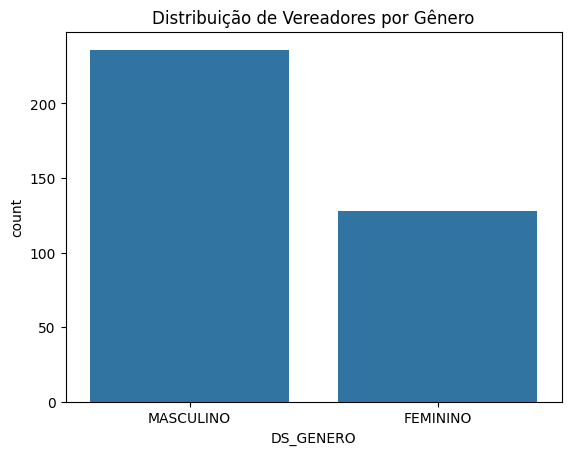

In [ ]:
sns.countplot(data=vereadores,x='DS_GENERO')
plt.title('Distribuição de Vereadores por Gênero')
plt.show()

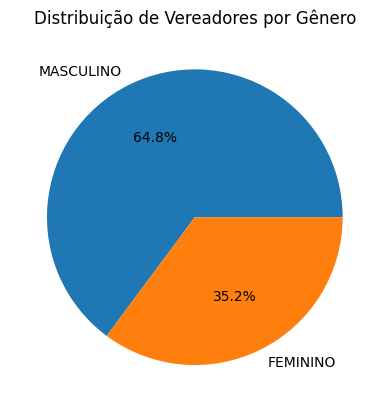

In [ ]:
plt.pie(dados['Quantidade'],labels=dados['Genero'],autopct='%1.1f%%')
plt.title('Distribuição de Vereadores por Gênero')
plt.show()

## 3.3 - Vereadores por Grau de Instrução

In [ ]:
instrucao = vereadores['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).round(2)*100
instrucao = instrucao.reset_index()
instrucao

,DS_GRAU_INSTRUCAO,proportion
0,SUPERIOR COMPLETO,55.0
1,ENSINO MÉDIO COMPLETO,28.0
2,SUPERIOR INCOMPLETO,7.0
3,ENSINO FUNDAMENTAL INCOMPLETO,4.0
4,ENSINO FUNDAMENTAL COMPLETO,4.0
5,ENSINO MÉDIO INCOMPLETO,3.0


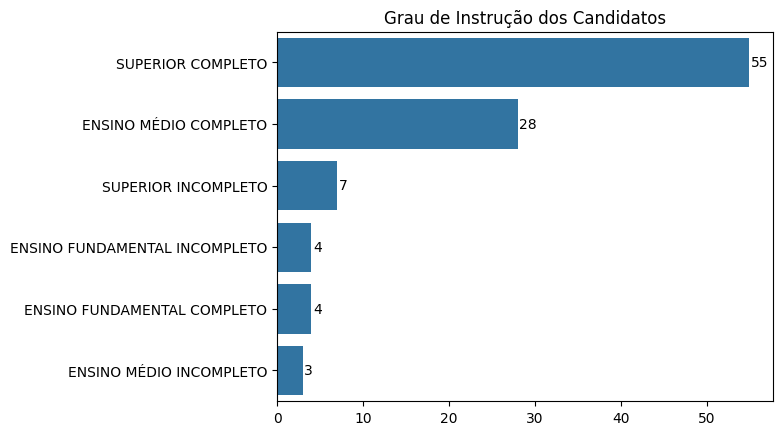

In [ ]:
barras = sns.barplot(data=instrucao, y='DS_GRAU_INSTRUCAO', x='proportion')
plt.title('Grau de Instrução dos Candidatos')
plt.xlabel('')
plt.ylabel('')

for container in barras.containers:
  barras.bar_label(container, padding=1)


plt.show()

## 3.4 - Cor e Raça dos Candidatos

In [ ]:
cor = vereadores['DS_COR_RACA'].value_counts(normalize=True).round(2)*100
cor = cor.reset_index()
cor

,DS_COR_RACA,proportion
0,BRANCA,68.0
1,PARDA,18.0
2,PRETA,12.0
3,AMARELA,1.0
4,INDÍGENA,0.0


## 3.5 - Agrupamento de Grau de Istrução e Estado Civil

In [ ]:
# ENSINO MÉDIO COMPLETO
temp = vereadores.groupby(['DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL']).size().reset_index().query('DS_GRAU_INSTRUCAO=="ENSINO MÉDIO COMPLETO"')
temp.rename(columns={0:'QUANTIDADE'},inplace=True)
temp.drop('DS_GRAU_INSTRUCAO',axis=1,inplace=True)
temp

,DS_ESTADO_CIVIL,QUANTIDADE
7,CASADO(A),56
8,DIVORCIADO(A),14
9,SEPARADO(A) JUDICIALMENTE,1
10,SOLTEIRO(A),28
11,VIÚVO(A),3


## 3.6 - Patrimonio Vereadores

In [ ]:
patrimonio = vereadores.merge(df_bem, how='left')
patrimonio.head()

,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,ANO_ELEICAO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002058261,JOÃO JOSÉ ALVES,PP,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,CABELEIREIRO E BARBEIRO,NaN,NaN,NaN
1,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124816,SERGIO CAMARGO DA SILVA,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024.0,Casa,"850000,00"
2,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124816,SERGIO CAMARGO DA SILVA,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024.0,"Veículo automotor terrestre: caminhão, automóv...","62890,00"
3,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124816,SERGIO CAMARGO DA SILVA,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024.0,"Veículo automotor terrestre: caminhão, automóv...","8335,00"
4,70998,SÃO JOSÉ DOS CAMPOS,VEREADOR,250002124816,SERGIO CAMARGO DA SILVA,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,2024.0,Depósito bancário em conta corrente no País,"5300,00"


In [ ]:
patrimonio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UE                  983 non-null    int64  
 1   NM_UE                  983 non-null    object 
 2   DS_CARGO               983 non-null    object 
 3   SQ_CANDIDATO           983 non-null    int64  
 4   NM_CANDIDATO           983 non-null    object 
 5   SG_PARTIDO             983 non-null    object 
 6   DS_GENERO              983 non-null    object 
 7   DS_GRAU_INSTRUCAO      983 non-null    object 
 8   DS_ESTADO_CIVIL        983 non-null    object 
 9   DS_COR_RACA            983 non-null    object 
 10  DS_OCUPACAO            983 non-null    object 
 11  ANO_ELEICAO            871 non-null    float64
 12  DS_TIPO_BEM_CANDIDATO  871 non-null    object 
 13  VR_BEM_CANDIDATO       871 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 107.6+ K

In [ ]:
patrimonio.isnull().sum() #mostra valores nulos

,0
SG_UE,0
NM_UE,0
DS_CARGO,0
SQ_CANDIDATO,0
NM_CANDIDATO,0
SG_PARTIDO,0
DS_GENERO,0
DS_GRAU_INSTRUCAO,0
DS_ESTADO_CIVIL,0
DS_COR_RACA,0


In [ ]:
patrimonio.dropna(inplace=True) #exclui as linhas com valores nulos

In [ ]:
#Troca , por . no campo VR BEM CANDIDATO
patrimonio['VR_BEM_CANDIDATO'] = patrimonio['VR_BEM_CANDIDATO'].apply(lambda x: float(x.replace(',','.')))

In [ ]:
patrimonio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 1 to 982
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UE                  871 non-null    int64  
 1   NM_UE                  871 non-null    object 
 2   DS_CARGO               871 non-null    object 
 3   SQ_CANDIDATO           871 non-null    int64  
 4   NM_CANDIDATO           871 non-null    object 
 5   SG_PARTIDO             871 non-null    object 
 6   DS_GENERO              871 non-null    object 
 7   DS_GRAU_INSTRUCAO      871 non-null    object 
 8   DS_ESTADO_CIVIL        871 non-null    object 
 9   DS_COR_RACA            871 non-null    object 
 10  DS_OCUPACAO            871 non-null    object 
 11  ANO_ELEICAO            871 non-null    float64
 12  DS_TIPO_BEM_CANDIDATO  871 non-null    object 
 13  VR_BEM_CANDIDATO       871 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 102.1+ KB


In [ ]:
total = patrimonio['VR_BEM_CANDIDATO'].sum()
f'R$ {total:,.2f}'.replace(',','Z').replace('.',',').replace('Z','.')

'R$ 151.725.057,09'

In [ ]:
dados = patrimonio.groupby(['NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum()\
        .sort_values(ascending=False).reset_index()

dados['VR_BEM_CANDIDATO'] = dados['VR_BEM_CANDIDATO'].apply(lambda x: f'R$ {x:,.2f}'.replace(',','Z').replace('.',',').replace('Z','.'))
pd.set_option('display.max_rows',None)
display(dados)

,NM_CANDIDATO,VR_BEM_CANDIDATO
0,ROBERTA PAPIN KAI,"R$ 36.970.000,00"
1,ALEXANDRE BAULÉ,"R$ 7.795.097,20"
2,LUIZ CARLOS MOTA,"R$ 5.490.000,00"
3,LINO BISPO DA ROCHA,"R$ 3.552.000,00"
4,ROSANA FERNANDES,"R$ 3.490.000,00"
5,PAULO SÉRGIO DA SILVA,"R$ 3.150.607,00"
6,ANDERSON ALVES SENE,"R$ 2.803.813,74"
7,JOSÉ CLAUDIO MANCILHA DE FARIA BARBOSA,"R$ 2.711.713,03"
8,SHAKESPEARE VIANA CARVALHO,"R$ 2.578.168,00"
9,VALÉRIA APARECIDA RODRIGUES LÁZARO,"R$ 2.279.000,00"


In [ ]:
nomes_vereadores = dados['NM_CANDIDATO'].head(15).to_list()
print(nomes_vereadores)

['ROBERTA PAPIN KAI', 'ALEXANDRE BAULÉ', 'LUIZ CARLOS MOTA', 'LINO BISPO DA ROCHA', 'ROSANA FERNANDES', 'PAULO SÉRGIO DA SILVA', 'ANDERSON ALVES SENE', 'JOSÉ CLAUDIO MANCILHA DE FARIA BARBOSA', 'SHAKESPEARE VIANA CARVALHO', 'VALÉRIA APARECIDA RODRIGUES LÁZARO', 'JUVENIL DE ALMEIDA SILVERIO', 'PAULO RODOLFO DE SOUSA', 'ROSANA RABELO MONTANINI', 'VANESSA MADALENA DA COSTA FORTES', 'CARLOS ROBERTO VIANA']


In [ ]:
# Usamos o @ porque estamos usando um valor de fora do dataframe
infos = vereadores.query('NM_CANDIDATO == @nomes_vereadores')\
        [['NM_CANDIDATO','SG_PARTIDO','DS_GENERO','DS_GRAU_INSTRUCAO',
          'DS_ESTADO_CIVIL','DS_COR_RACA']]
infos

,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA
654,SHAKESPEARE VIANA CARVALHO,PL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA
12989,ROSANA RABELO MONTANINI,UNIÃO,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA
22549,CARLOS ROBERTO VIANA,UNIÃO,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA
29706,ROSANA FERNANDES,PL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA
29712,LUIZ CARLOS MOTA,PL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA
33940,ROBERTA PAPIN KAI,PODE,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA
39611,LINO BISPO DA ROCHA,PL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PRETA
41053,PAULO RODOLFO DE SOUSA,NOVO,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA
43915,JUVENIL DE ALMEIDA SILVERIO,PSD,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA
49346,ANDERSON ALVES SENE,PL,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA


In [ ]:
cor = infos.groupby('DS_COR_RACA').size().reset_index()
cor.rename(columns={0:'Quantidade','DS_COR_RACA':'Cor'},inplace=True)
cor

,Cor,Quantidade
0,BRANCA,10
1,PARDA,2
2,PRETA,3


In [ ]:
instrucao = infos.groupby('DS_GRAU_INSTRUCAO').size().reset_index()
instrucao.rename(columns={0:'Quantidade','DS_GRAU_INSTRUCAO':'Instrução'},inplace=True)
instrucao

,Instrução,Quantidade
0,ENSINO MÉDIO COMPLETO,4
1,SUPERIOR COMPLETO,11


In [ ]:
estado_civil = infos.groupby('DS_ESTADO_CIVIL').size().reset_index()
estado_civil.rename(columns={0:'Quantidade','DS_ESTADO_CIVIL':'Estado Civil'},inplace=True)
estado_civil

,Estado Civil,Quantidade
0,CASADO(A),13
1,DIVORCIADO(A),1
2,SOLTEIRO(A),1


Extra:

In [ ]:
colunas3 = ['SQ_CANDIDATO','SG_UE', 'SG_UF','NM_UE','DS_CARGO','NM_CANDIDATO',
           'SG_PARTIDO','DS_GENERO','DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL',
           'DS_COR_RACA','DS_OCUPACAO']

df_brasil = pd.read_csv('/content/consulta_cand_2024_BRASIL.csv',
                      encoding='latin1',
                      sep=';',
                      usecols=colunas3)

df_brasil.head()

,SG_UF,SG_UE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO
0,MA,7030,ALCÂNTARA,VEREADOR,100002324121,RAMILTON DAS MERCES LEMOS PEREIRA,REPUBLICANOS,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL
1,MG,45276,FORTUNA DE MINAS,VEREADOR,130002377206,EDUARDA PAULINA DE JESUS BARBOSA,PV,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL
2,MG,45276,FORTUNA DE MINAS,VEREADOR,130002377217,VANILA GOMES MARQUES,MOBILIZA,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL,NÃO DIVULGÁVEL
3,SP,67172,MOGI MIRIM,VEREADOR,250002337150,GUILHERME HENRIQUE SAGLIA CAETANO,AGIR,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO MÉDIO
4,PA,4936,MOJU,VEREADOR,140002242292,PATRICIA CORREA DA SILVA,PODE,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,OUTROS


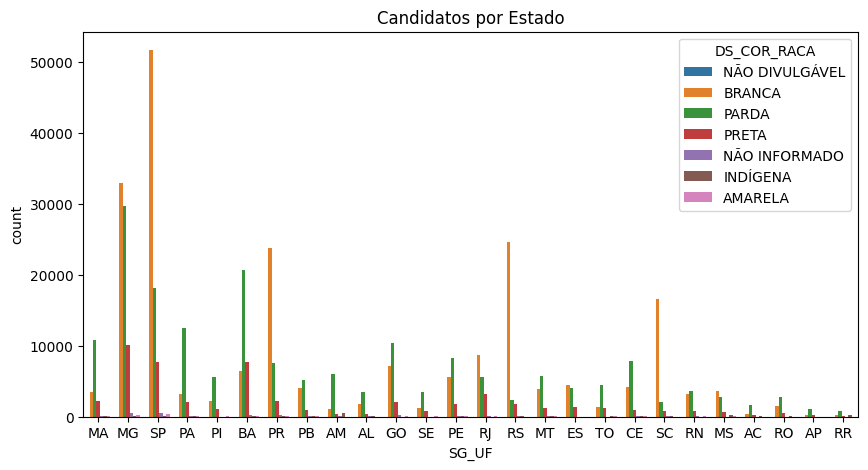

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_brasil,x='SG_UF', hue='DS_COR_RACA')
plt.title('Candidatos por Estado')
plt.show()

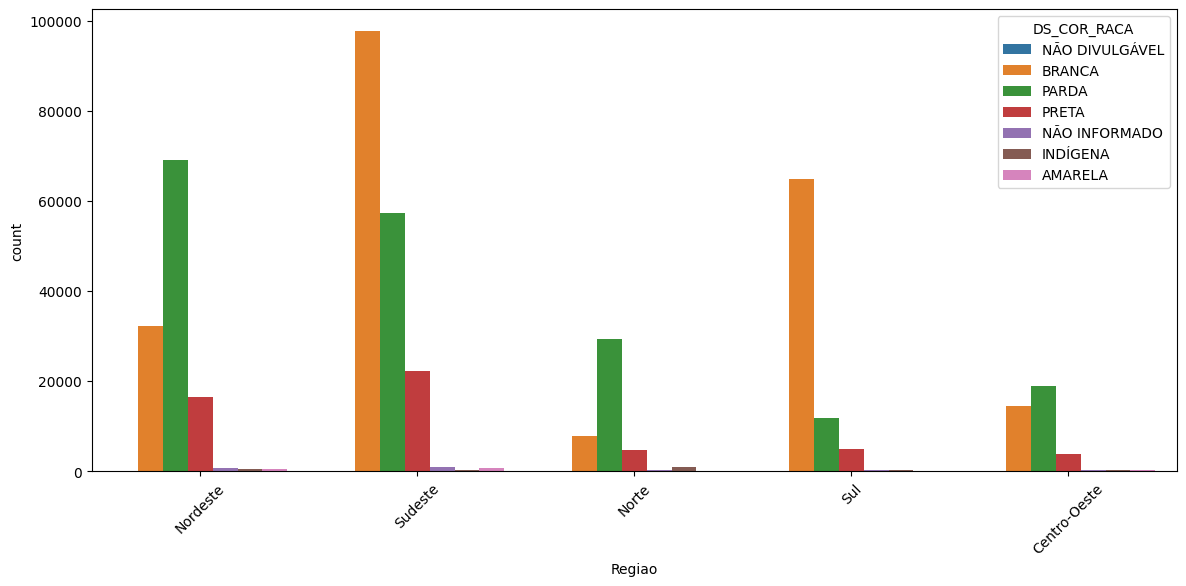

In [ ]:
regioes = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'SC', 'RS']
}

def classificar_regiao(uf):
  for regiao, estados in regioes.items():
    if uf in estados:
      return regiao
  return 'Desconhecida'

df_brasil['Regiao'] = df_brasil['SG_UF'].apply(classificar_regiao)

plt.figure(figsize=(14,6))
sns.countplot(data=df_brasil, x='Regiao',hue='DS_COR_RACA')
plt.xticks(rotation=45)
plt.show()